## Importing the libraries

In [38]:
import pandas as pd

## Reading the Resume dataset

In [2]:
df = pd.read_csv("Resume\Resume.csv")

In [3]:
df.head(5)

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [4]:
print(df["Resume_str"][0])

         HR ADMINISTRATOR/MARKETING ASSOCIATE

HR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss preve

## Data Exploration and Preprocessing

#### Data Exploration

For this classification task, we will use the following feature and label:
- `Resume_str` - The resume text (feature)
- `Category` - The category of the resume (label)

And the other two features are not used for this task.

In [5]:
# Dropping the nonessential columns

df.drop(columns=["ID", "Resume_html"], inplace=True)
df.head(5)

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


In [6]:
df.info()
# the dataframe has 2484 entries of data for both of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resume_str  2484 non-null   object
 1   Category    2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


In [7]:
df.isnull().sum()
# there are no null values

Resume_str    0
Category      0
dtype: int64

In [8]:
number_of_category = df["Category"].nunique()
print(f"Number of Categories: {number_of_category}")

Number of Categories: 24


In [9]:
df["Category"].value_counts()

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

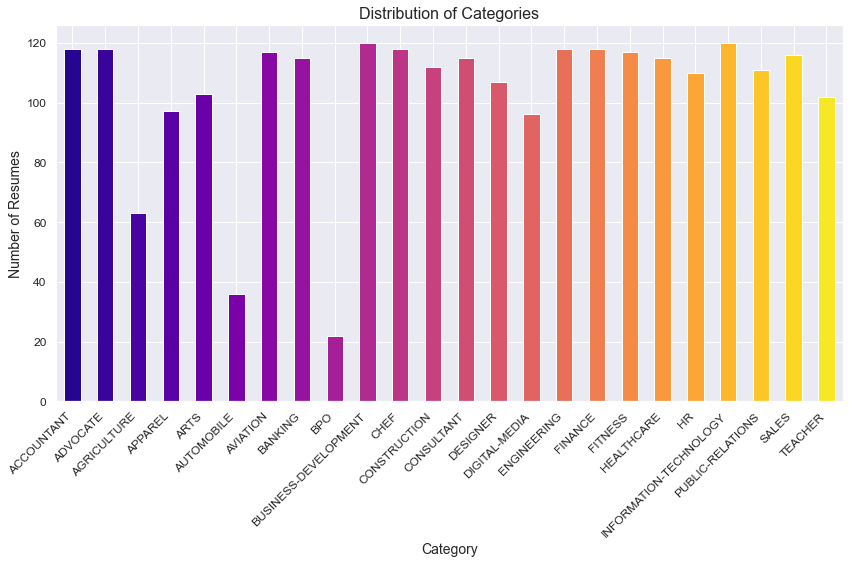

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 8), 
                                                color=sns.color_palette("plasma", 
                                                df['Category'].nunique()))

plt.title('Distribution of Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Resumes', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()


From the value count of the column "Category" and the graph above we can see that Information-Technology and Business-Development has hightest number of resumes. And, the least number of resumes are for BPO.

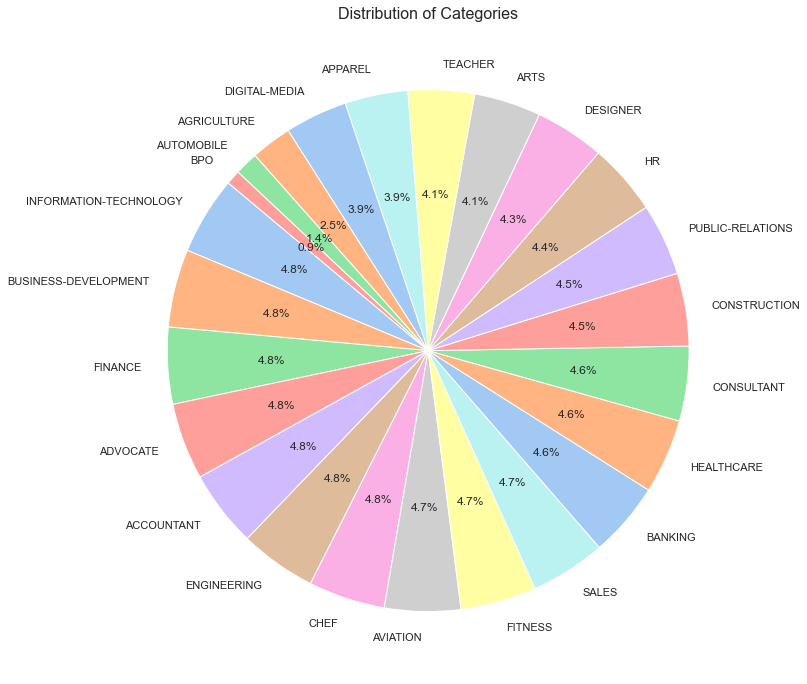

In [11]:
# Pie chart for the distribution of the 'Category' column

category_counts = df['Category'].value_counts()

plt.figure(figsize=(12, 12))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, 
        colors=sns.color_palette("pastel", len(category_counts)))
plt.title('Distribution of Categories', fontsize=16)
plt.show()

From the above pie chart, we can see that the distribution of data is not uniform. We have less data for the category 'BPO', 'Automobile' and 'Agriculture' than the other categories. This might lead to a biased model or potential overfitting model.

#### Data Preprocessing

In [12]:
import nltk
import re
Stemmer = nltk.stem.PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = nltk.tokenize.word_tokenize(text)
    text = [word for word in text if not word in nltk.corpus.stopwords.words('english')]
    text = [Stemmer.stem(word) for word in text]
    return ' '.join(text)

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nehal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Here using the preprocess_text function, we lowered the case of the text of
the resume marks and removed stopwords from the text.

In [14]:
df['Resume'] = df['Resume_str'].apply(lambda text: preprocess_text(text))
df.pop('Resume_str')

0                HR ADMINISTRATOR/MARKETING ASSOCIATE\...
1                HR SPECIALIST, US HR OPERATIONS      ...
2                HR DIRECTOR       Summary      Over 2...
3                HR SPECIALIST       Summary    Dedica...
4                HR MANAGER         Skill Highlights  ...
                              ...                        
2479             RANK: SGT/E-5 NON- COMMISSIONED OFFIC...
2480             GOVERNMENT RELATIONS, COMMUNICATIONS ...
2481             GEEK SQUAD AGENT         Professional...
2482             PROGRAM DIRECTOR / OFFICE MANAGER    ...
2483             STOREKEEPER II       Professional Sum...
Name: Resume_str, Length: 2484, dtype: object

In [15]:
df.head(5)

,Category,Resume
0,HR,hr administr market associ hr administr summar...
1,HR,hr specialist us hr oper summari versatil medi...
2,HR,hr director summari year experi recruit plu ye...
3,HR,hr specialist summari dedic driven dynam year ...
4,HR,hr manag skill highlight hr skill hr depart st...


### Data Cleaning

In [16]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nehal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

stop_words = stopwords.words("english")

def remove_stop_words(text):
    finalized_text = []
    for token in simple_preprocess(text):
        if token not in STOPWORDS and len(token) > 3 and token not in stop_words:
            finalized_text.append(token)
    return finalized_text

Using the remove_stop_words function, we removed the stop words from the resume text, removed the punctuation, removed words having length less that 2 and store it in a new column called 'Resume_Clean'.

In [18]:
df["Resume_Clean"] = df["Resume"].apply(remove_stop_words).astype(str)
df.head()

,Category,Resume,Resume_Clean
0,HR,hr administr market associ hr administr summar...,"['administr', 'market', 'associ', 'administr',..."
1,HR,hr specialist us hr oper summari versatil medi...,"['specialist', 'oper', 'summari', 'versatil', ..."
2,HR,hr director summari year experi recruit plu ye...,"['director', 'summari', 'year', 'experi', 'rec..."
3,HR,hr specialist summari dedic driven dynam year ...,"['specialist', 'summari', 'dedic', 'driven', '..."
4,HR,hr manag skill highlight hr skill hr depart st...,"['manag', 'skill', 'highlight', 'skill', 'depa..."


In [19]:
print(df["Resume_Clean"][5])

['generalist', 'summari', 'dedic', 'focus', 'administr', 'assist', 'excel', 'priorit', 'complet', 'multipl', 'task', 'simultan', 'follow', 'achiev', 'project', 'goal', 'seek', 'role', 'increas', 'respons', 'author', 'highlight', 'microsoft', 'offic', 'profici', 'excel', 'spreadsheet', 'meticul', 'attent', 'result', 'orient', 'self', 'direct', 'time', 'manag', 'profession', 'matur', 'self', 'starter', 'legal', 'administr', 'support', 'experi', 'generalist', 'compani', 'citi', 'state', 'manag', 'visa', 'relat', 'employ', 'process', 'immigr', 'faculti', 'staff', 'improv', 'product', 'enhanc', 'visa', 'relat', 'servic', 'improv', 'oper', 'structur', 'develop', 'guidelin', 'tool', 'intern', 'extern', 'administr', 'immigr', 'employ', 'procedur', 'reduc', 'intern', 'employ', 'author', 'process', 'time', 'approxim', 'percent', 'prepar', 'review', 'submit', 'petit', 'usci', 'adjud', 'maintain', 'electron', 'databas', 'petit', 'file', 'serv', 'univers', 'point', 'contact', 'usci', 'develop', 'pr

### Splitting the dataset

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["Resume_Clean"])
y = df['Category']

The above code uses TfidfVectorizer to convert text to numerical vectors (here float) for X_train and X_test

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

### Model Selection

#### Model training with RandomForestClassifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

random_forest_model = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [100, 500, 1000],
    "max_features": ["sqrt", "log2"],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    "max_depth": [4, 5, 6, 7, 8, 9, 10],
    "criterion" :["gini", "entropy"]
}

grid = GridSearchCV(estimator=random_forest_model, param_grid=param_grid,
                           cv=5, scoring="accuracy", return_train_score=False,
                           verbose=1)

grid_search = grid.fit(X_train, y_train)

print(grid_search.best_params_)

Fitting 5 folds for each of 1512 candidates, totalling 7560 fits
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1000}


In [26]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=1000,
                                             max_features="sqrt",
                                             max_depth=10,
                                             criterion="gini",
                                             min_samples_leaf=2,
                                             min_samples_split=2,
                                             bootstrap=True,
                                             random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=1000,
                       random_state=42)

In [27]:
prediction_random_forest = random_forest_model.predict(X_val)
prediction_random_forest

array(['INFORMATION-TECHNOLOGY', 'HEALTHCARE', 'DESIGNER', 'TEACHER',
       'AVIATION', 'HEALTHCARE', 'SALES', 'ACCOUNTANT',
       'INFORMATION-TECHNOLOGY', 'FITNESS', 'ENGINEERING',
       'DIGITAL-MEDIA', 'DIGITAL-MEDIA', 'BUSINESS-DEVELOPMENT',
       'ACCOUNTANT', 'INFORMATION-TECHNOLOGY', 'ENGINEERING',
       'BUSINESS-DEVELOPMENT', 'DESIGNER', 'CHEF', 'ACCOUNTANT',
       'DESIGNER', 'SALES', 'AVIATION', 'FITNESS', 'CONSTRUCTION',
       'HEALTHCARE', 'DESIGNER', 'HEALTHCARE', 'CONSTRUCTION',
       'CONSULTANT', 'AVIATION', 'ADVOCATE', 'HR', 'DIGITAL-MEDIA',
       'AVIATION', 'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS',
       'TEACHER', 'APPAREL', 'ADVOCATE', 'INFORMATION-TECHNOLOGY',
       'INFORMATION-TECHNOLOGY', 'BANKING', 'HEALTHCARE', 'FITNESS',
       'CONSTRUCTION', 'CHEF', 'FITNESS', 'ENGINEERING', 'FINANCE',
       'INFORMATION-TECHNOLOGY', 'HR', 'BUSINESS-DEVELOPMENT',
       'ENGINEERING', 'TEACHER', 'DIGITAL-MEDIA', 'BUSINESS-DEVELOPMENT',
       'AVIATION', 

In [28]:
train_score = random_forest_model.score(X_train, y_train)
print(f"Train Accuracy: {train_score * 100:.2f}%")

test_score = random_forest_model.score(X_test, y_test)
print(f"Test Accuracy: {test_score * 100:.2f}%")

Train Accuracy: 91.48%
Test Accuracy: 62.20%


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

prediction_random_forest = random_forest_model.predict(X_test)

accuracy = accuracy_score(y_test, prediction_random_forest)
precision = precision_score(y_test, prediction_random_forest, average='weighted', zero_division=1)
recall = recall_score(y_test, prediction_random_forest, average='weighted')
f1 = f1_score(y_test, prediction_random_forest, average='weighted')

print(f"Accuracy for Random Forest Classifier: {accuracy * 100:.2f}%")
print(f"Precision for Random Forest Classifier: {precision * 100:.2f}%")
print(f"Recall for Random Forest Classifier: {recall * 100:.2f}%")
print(f"F1 for Random Forest Classifier: {f1 * 100:.2f}%")

Accuracy for Random Forest Classifier: 62.20%
Precision for Random Forest Classifier: 67.32%
Recall for Random Forest Classifier: 62.20%
F1 for Random Forest Classifier: 58.25%


##### Model training with GradientBoostingClassifier

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                      max_depth=5, random_state=42)

gb_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, random_state=42)

In [31]:
prediction_gb_model =gb_model.predict(X_val)
prediction_gb_model

array(['INFORMATION-TECHNOLOGY', 'HEALTHCARE', 'DESIGNER', 'TEACHER',
       'AVIATION', 'HEALTHCARE', 'FINANCE', 'ACCOUNTANT', 'CONSULTANT',
       'FITNESS', 'ENGINEERING', 'TEACHER', 'DIGITAL-MEDIA', 'HR',
       'SALES', 'INFORMATION-TECHNOLOGY', 'DESIGNER', 'ARTS', 'DESIGNER',
       'CHEF', 'ACCOUNTANT', 'DESIGNER', 'SALES', 'CONSULTANT', 'FITNESS',
       'SALES', 'AUTOMOBILE', 'DESIGNER', 'CHEF', 'CONSTRUCTION',
       'CONSULTANT', 'AVIATION', 'ADVOCATE', 'HR', 'DIGITAL-MEDIA',
       'AVIATION', 'CONSULTANT', 'APPAREL', 'ARTS', 'APPAREL', 'ADVOCATE',
       'ARTS', 'ARTS', 'BANKING', 'CONSULTANT', 'FITNESS', 'CONSTRUCTION',
       'CHEF', 'FITNESS', 'DESIGNER', 'ARTS', 'INFORMATION-TECHNOLOGY',
       'HEALTHCARE', 'ARTS', 'ENGINEERING', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'BUSINESS-DEVELOPMENT', 'ENGINEERING',
       'ARTS', 'ENGINEERING', 'DESIGNER', 'AGRICULTURE', 'CONSTRUCTION',
       'INFORMATION-TECHNOLOGY', 'BANKING', 'HEALTHCARE', 'CONSTRUCTION',
       'FITNE

In [32]:
train_score = gb_model.score(X_train, y_train)
print(f"Train Accuracy: {train_score * 100:.2f}%")

test_score = gb_model.score(X_test, y_test)
print(f"Test Accuracy: {test_score * 100:.2f}%")

Train Accuracy: 100.00%
Test Accuracy: 58.71%


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

prediction_gb_model = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, prediction_gb_model)
precision = precision_score(y_test, prediction_gb_model, average='weighted', zero_division=1)
recall = recall_score(y_test, prediction_gb_model, average='weighted')
f1 = f1_score(y_test, prediction_gb_model, average='weighted')

print(f"Accuracy for Gradient Boosting Classifier: {accuracy * 100:.2f}%")
print(f"Precision for Gradient Boosting Classifier: {precision * 100:.2f}%")
print(f"Recall for Gradient Boosting Classifier: {recall * 100:.2f}%")
print(f"F1 for Gradient Boosting Classifier: {f1 * 100:.2f}%")

Accuracy for Gradient Boosting Classifier: 58.71%
Precision for Gradient Boosting Classifier: 63.15%
Recall for Gradient Boosting Classifier: 58.71%
F1 for Gradient Boosting Classifier: 59.22%


##### Model training with LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=1, max_iter=1000, penalty="l1", solver="saga", random_state=42)

lr_model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000, penalty='l1', random_state=42,
                   solver='saga')

In [35]:
prediction_lr_model =lr_model.predict(X_val)
prediction_lr_model

array(['INFORMATION-TECHNOLOGY', 'HEALTHCARE', 'DESIGNER', 'TEACHER',
       'AVIATION', 'HEALTHCARE', 'FINANCE', 'ACCOUNTANT',
       'INFORMATION-TECHNOLOGY', 'FITNESS', 'ENGINEERING',
       'DIGITAL-MEDIA', 'DIGITAL-MEDIA', 'BUSINESS-DEVELOPMENT',
       'ACCOUNTANT', 'INFORMATION-TECHNOLOGY', 'DESIGNER',
       'BUSINESS-DEVELOPMENT', 'DESIGNER', 'BUSINESS-DEVELOPMENT',
       'ACCOUNTANT', 'DESIGNER', 'CONSULTANT', 'AVIATION', 'FITNESS',
       'CONSTRUCTION', 'HEALTHCARE', 'DESIGNER', 'HEALTHCARE',
       'CONSTRUCTION', 'CONSULTANT', 'AVIATION', 'ADVOCATE', 'HR',
       'DIGITAL-MEDIA', 'AVIATION', 'INFORMATION-TECHNOLOGY',
       'PUBLIC-RELATIONS', 'ARTS', 'APPAREL', 'ADVOCATE',
       'INFORMATION-TECHNOLOGY', 'INFORMATION-TECHNOLOGY', 'BANKING',
       'ADVOCATE', 'FITNESS', 'CONSTRUCTION', 'CHEF', 'FITNESS',
       'ENGINEERING', 'FINANCE', 'INFORMATION-TECHNOLOGY', 'HR',
       'FITNESS', 'ENGINEERING', 'ADVOCATE', 'CONSULTANT',
       'BUSINESS-DEVELOPMENT', 'ENGINEERING

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

prediction_lr_model = lr_model.predict(X_test) 

accuracy = accuracy_score(y_test, prediction_lr_model)
precision = precision_score(y_test, prediction_lr_model, average='weighted', zero_division=1)
recall = recall_score(y_test, prediction_lr_model, average='weighted')
f1 = f1_score(y_test, prediction_lr_model, average='weighted')

print(f"Accuracy for Logistic Regression: {accuracy * 100:.2f}%")
print(f"Precision for Logistic Regression: {precision * 100:.2f}%")
print(f"Recall for Logistic Regression: {recall * 100:.2f}%")
print(f"F1 for Logistic Regression: {f1 * 100:.2f}%")

Accuracy for Logistic Regression: 65.68%
Precision for Logistic Regression: 69.80%
Recall for Logistic Regression: 65.68%
F1 for Logistic Regression: 64.52%


We have used three different models to classify the resumes. The models are:
1. Logistic Regression
2. Random Forest
3. Gradient Boosting

Among these three models, we have found that Logistic Regression is the best model for our dataset. We have used the following metrics to evaluate the models:
1. Test Accuracy
2. Precision
3. Recall
4. F1 Score

### Saving the model

In [37]:
import joblib
joblib.dump(lr_model, "artifacts/logistic_regression_model.pkl")
joblib.dump(tfidf, "artifacts/vectorizer.pkl")

['artifacts/vectorizer.pkl']